### Fed-Watch BTC Price Prediction
Requirements:Conda, pandas, numpy, sckikitlearn, matplotlib, statsmodels

conda create --name fed_research

conda activate fed_research

conda install pandas numpy scikit-learn matplotlib statsmodels




In [18]:
### Imports
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import re
import math




In [20]:
# Load data
df = pd.read_csv('FED_DATA/FedMeetingHistory_20240310.csv')  
df
new_header = df.iloc[0]
df = df[1:]
header_vals = []
for i in new_header:
    header_vals.append(i)
list = header_vals[:-1]
df

,Unnamed: 0,History for 20 Mar 2024 Fed meeting,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 574,Unnamed: 575,Unnamed: 576,Unnamed: 577,Unnamed: 578,Unnamed: 579,Unnamed: 580,Unnamed: 581,Unnamed: 582,History for 30 Apr 2025 Fed meetingHistory for 18 Jun 2025 Fed meetingHistory for 30 Jul 2025 Fed meetingHistory for 24 Sep 2025 Fed meeting
1,3/10/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/13/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/14/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/15/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3/16/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,3/4/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
249,3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
250,3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
251,3/7/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [21]:

def parse_numbers(string):
    match = re.match(r'\((\d+)-(\d+)\)', string)
    if match:
        return tuple(map(int, match.groups()))
    else:
        return "Date"
    
parsed_header_vals = [parse_numbers(val) for val in list]
parsed_header_vals.append("NaVals")
parsed_header_vals
df.columns = parsed_header_vals
df.set_index('Date', inplace=True)
df = df.drop('NaVals', axis=1)
df['WAE'] = None 
df

,"(0, 25)","(25, 50)","(50, 75)","(75, 100)","(100, 125)","(125, 150)","(150, 175)","(175, 200)","(200, 225)","(225, 250)",...,"(1450, 1475)","(1475, 1500)","(1500, 1525)","(1525, 1550)","(1550, 1575)","(1575, 1600)","(1600, 1625)","(1625, 1650)","(1650, 1675)",WAE
Date,,,,,,,,,,,,,,,,,,,,,
3/10/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/13/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/14/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/15/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/16/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/4/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None


In [22]:
def midpoint(interval):
    start, end = interval
    return (start + end) / 2

df.columns = [midpoint(col) if isinstance(col, tuple) and col not in ['Date', 'WAE'] else col for col in df.columns]
df
#df.fillna(0, inplace=True)



,12.5,37.5,62.5,87.5,112.5,137.5,162.5,187.5,212.5,237.5,...,1462.5,1487.5,1512.5,1537.5,1562.5,1587.5,1612.5,1637.5,1662.5,WAE
Date,,,,,,,,,,,,,,,,,,,,,
3/10/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/13/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/14/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/15/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3/16/2023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/4/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,None


In [26]:
df = df.apply(pd.to_numeric, errors='coerce')
df['WAE'] = (df.iloc[:, :-1] * df.columns[:-1].astype(float)).sum(axis=1)
df['WAE_Percentage_Change'] = df['WAE'].pct_change()
df

,12.5,37.5,62.5,87.5,112.5,137.5,162.5,187.5,212.5,237.5,...,1487.5,1512.5,1537.5,1562.5,1587.5,1612.5,1637.5,1662.5,WAE,WAE_Percentage_Change
Date,,,,,,,,,,,,,,,,,,,,,
3/10/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.767775,NaN
3/13/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.404700,-0.178752
3/14/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401.012000,0.059744
3/15/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.905138,-0.062609
3/16/2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.595175,0.065682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/4/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4369.156675,0.011889
3/5/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4338.380475,-0.007044
3/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4342.737775,0.001004


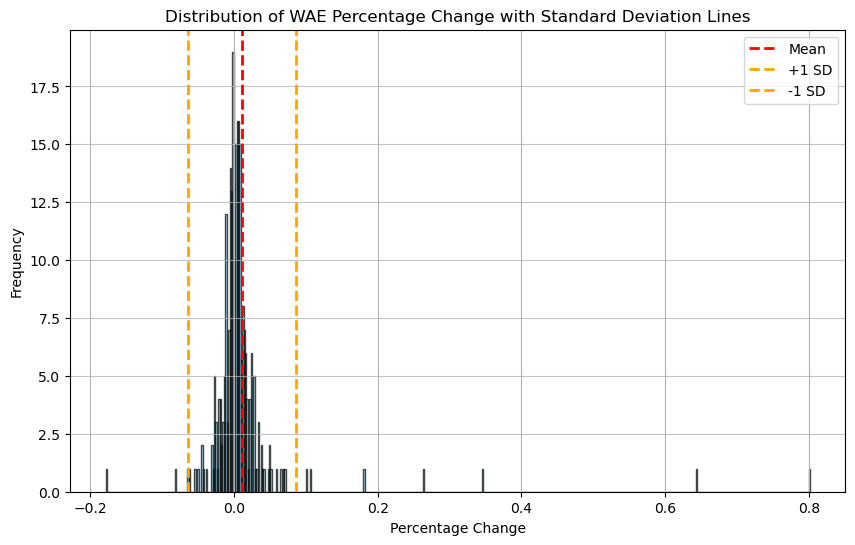

In [32]:
plt.figure(figsize=(10, 6))
df['WAE_Percentage_Change'].hist(bins=500, color='skyblue', edgecolor='black', alpha=0.7)

std_dev = df['WAE_Percentage_Change'].std()

plt.axvline(df['WAE_Percentage_Change'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['WAE_Percentage_Change'].mean() + std_dev, color='orange', linestyle='dashed', linewidth=2, label='+1 SD')
plt.axvline(df['WAE_Percentage_Change'].mean() - std_dev, color='orange', linestyle='dashed', linewidth=2, label='-1 SD')

plt.title('Distribution of WAE Percentage Change with Standard Deviation Lines')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

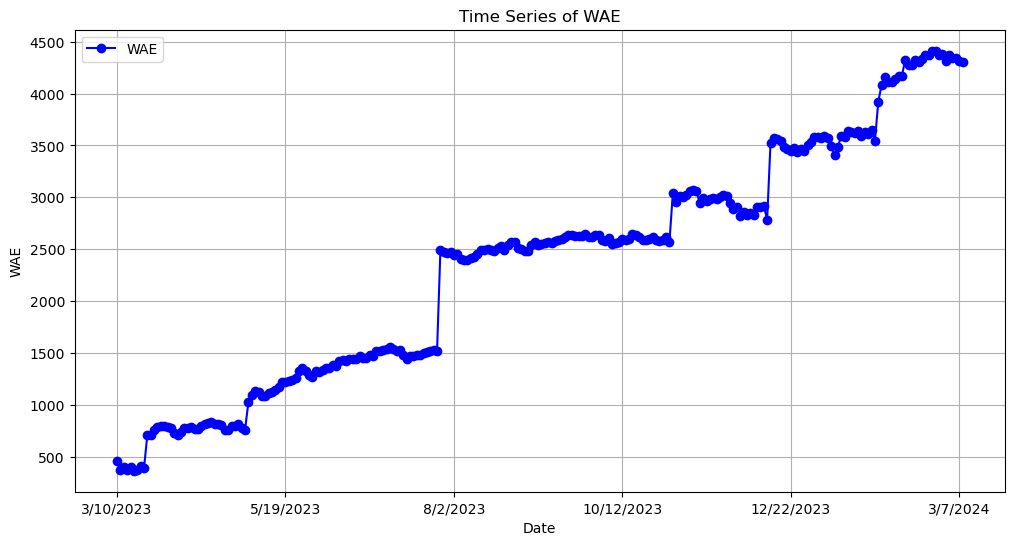

In [33]:
plt.figure(figsize=(12, 6))
df['WAE'].plot(label='WAE', marker='o', linestyle='-', color='blue')

plt.title('Time Series of WAE')
plt.xlabel('Date')
plt.ylabel('WAE')
plt.legend()
plt.grid(True)
plt.show()

In [34]:

df.to_csv('fed_data_wae.csv')

In [12]:
test_df = df[:20]
test_df
test_df = test_df.apply(pd.to_numeric, errors='coerce')
test_df

,12.5,37.5,62.5,87.5,112.5,137.5,162.5,187.5,212.5,237.5,...,1462.5,1487.5,1512.5,1537.5,1562.5,1587.5,1612.5,1637.5,1662.5,WAE
Date,,,,,,,,,,,,,,,,,,,,,
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000075,0.001464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000100,0.002311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# rows = []
# for row in test_df.iterrows():
#     for x in row:
        
test_df['WAE'] = (test_df.iloc[:, :-1] * test_df.columns[:-1].astype(float)).sum(axis=1)
test_df

,12.5,37.5,62.5,87.5,112.5,137.5,162.5,187.5,212.5,237.5,...,1462.5,1487.5,1512.5,1537.5,1562.5,1587.5,1612.5,1637.5,1662.5,WAE
Date,,,,,,,,,,,,,,,,,,,,,
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,435.767775
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353.404700
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.012000
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000075,0.001464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.905112
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375.595175
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000100,0.002311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,343.167012
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000858,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353.618737
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391.487400
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.225838


In [ ]:

# Set 'Date' as the index
#df['Date'] = pd.to_datetime(df['Date'])


# Optionally, resample the data to a specific frequency (e.g., daily)
#df_resampled = df.resample('D').mean().fillna(method='ffill')  # Adjust frequency as needed
